In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
X_big = np.concatenate([x, x])
Y_big = np.concatenate([y, -y])
# x

In [5]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
X_small = np.concatenate([x1, x1])
Y_small = np.concatenate([y1, -y1])



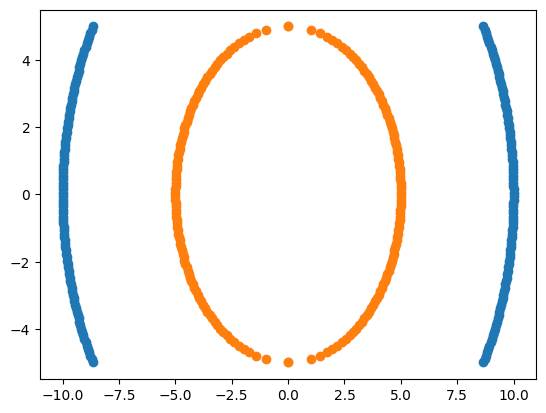

In [6]:
plt.scatter(Y_big,X_big)
plt.scatter(Y_small,X_small)
plt.show()

In [7]:
import pandas as pd
df1 = pd.DataFrame({'X1': X_big, 'X2': Y_big})
df1['Y'] = 0
df2 = pd.DataFrame({'X1' : X_small,'X2' : Y_small})
df2['Y'] = 1
df = pd.concat([df1,df2],ignore_index=True)
df.head()

,X1,X2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0


In [8]:
X = df.iloc[:,:2]
y = df.Y

In [9]:
y
X

,X1,X2
0,-5.00000,8.660254
1,-4.89899,8.717792
2,-4.79798,8.773790
3,-4.69697,8.828277
4,-4.59596,8.881281
...,...,...
395,4.59596,-1.969049
396,4.69697,-1.714198
397,4.79798,-1.406908
398,4.89899,-0.999949


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.25)

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')  # for linear we get accura 0.45
classifier.fit(X_train,y_train)



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

1.0

## polynomilal kernal 

$k(x,y) = (x^Ty+C)^d$

In [13]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df["X1_square"] = df['X1']**2
df["X2_square"] = df["X2"]**2
df["X1*X2"] = df["X1"]*df["X2"]

df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [14]:
### Independent and Dependent features
X = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df['Y']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)
X_train

,X1,X2,X1_square,X2_square,X1*X2
250,0.050505,4.999745,0.002551,24.997449,0.252512
63,1.363636,9.906589,1.859504,98.140496,13.508984
312,-3.787879,-3.263736,14.348026,10.651974,12.362637
159,0.959596,-9.953852,0.920824,99.079176,-9.551676
283,3.383838,3.680983,11.450362,13.549638,12.455852
...,...,...,...,...,...
323,-2.676768,-4.223140,7.165085,17.834915,11.304366
192,4.292929,-9.031653,18.429242,81.570758,-38.772248
117,-3.282828,-9.445795,10.776962,89.223038,31.008922
47,-0.252525,9.996811,0.063769,99.936231,-2.524447


In [17]:
import plotly.express  as px
fig = px.scatter_3d(df,x = 'X1',y = 'X2',z = 'X1*X2',color='Y')
fig.show()

In [19]:
fig = px.scatter_3d(df, x='X1_square', y='X1_square', z='X1*X2',
              color='Y')
fig.show()

In [20]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0